# Flight Price Prediction Project

In [1]:
#importing all the required libraries for EDA and vizualiztion.
import pandas as pd    # library for EDA.
import numpy as np     # library for numerical calculations.
import seaborn as sns  # library for vizualization.
import matplotlib.pyplot as plt  # library for vizualization.
import math
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings

In [124]:
#lets load train dataset 
df_train=pd.read_excel(r'C:\Users\Ismail\Desktop\Copy of Data_Train(1).xlsx')
#lets load test dataset 
df_test=pd.read_excel(r'C:\Users\Ismail\Desktop\Copy of Test_set(1).xlsx')
df_sample=pd.read_excel(r'C:\Users\Ismail\Desktop\Copy of Sample_submission(1).xlsx')

In [125]:
#lets check the type of dataset
type(df_train)
type(df_test)
type(df_sample)
#since our dataset is already dataframe, no need to again make dataframe

pandas.core.frame.DataFrame

In [126]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [127]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [128]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

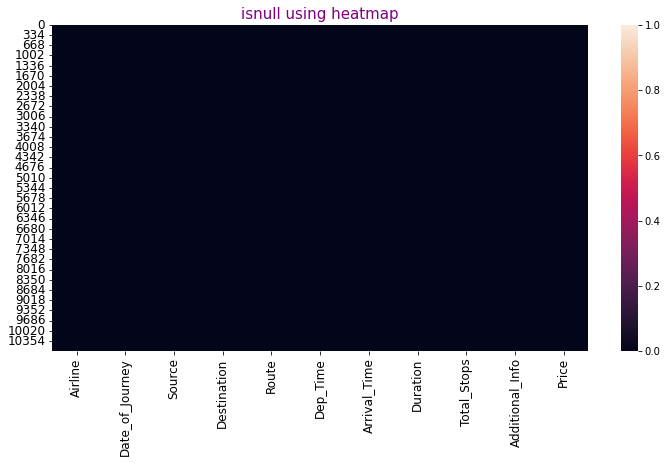

In [129]:
#isnull using heat map
plt.figure(figsize=(12,6))
sns.heatmap(df_train.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [130]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

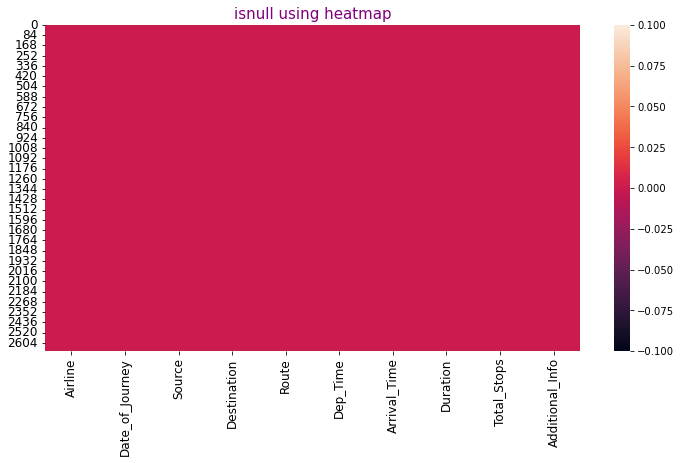

In [131]:
#isnull using heat map
plt.figure(figsize=(12,6))
sns.heatmap(df_test.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [132]:
df_train=df_train.dropna()

In [133]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

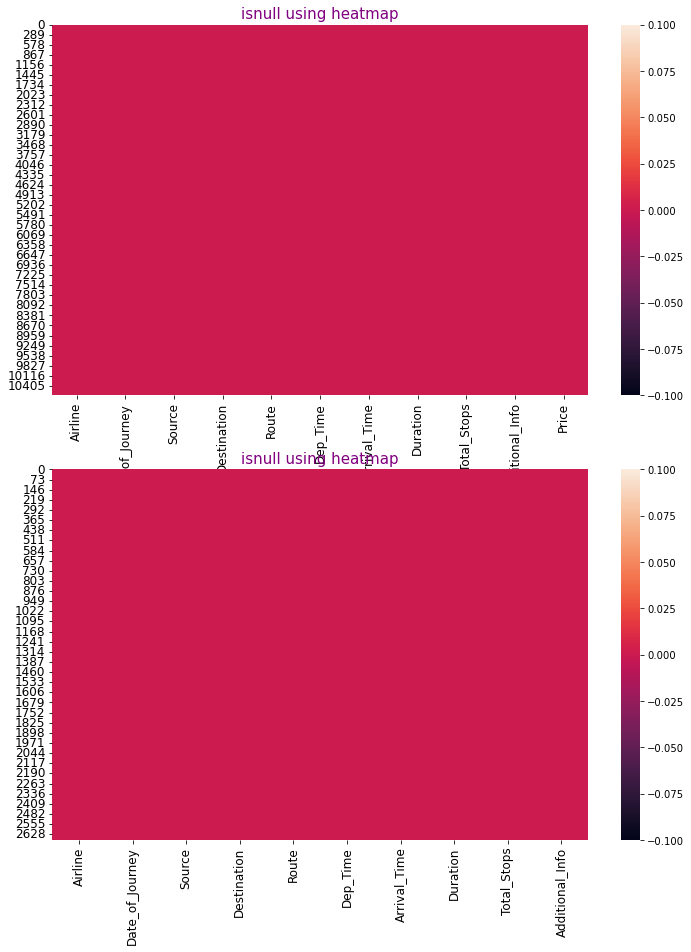

In [134]:
#isnull using heat map
plt.figure(figsize=(12,15))

plt.subplot(2,1,1)
sns.heatmap(df_train.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,1,2)
sns.heatmap(df_test.isnull())
plt.title('isnull using heatmap', fontsize=15, color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [135]:
print(df_train.shape),
df_test.shape

(10682, 11)


(2671, 10)

In [136]:
df_train.dtypes, df_test.dtypes

(Airline            object
 Date_of_Journey    object
 Source             object
 Destination        object
 Route              object
 Dep_Time           object
 Arrival_Time       object
 Duration           object
 Total_Stops        object
 Additional_Info    object
 Price               int64
 dtype: object,
 Airline            object
 Date_of_Journey    object
 Source             object
 Destination        object
 Route              object
 Dep_Time           object
 Arrival_Time       object
 Duration           object
 Total_Stops        object
 Additional_Info    object
 dtype: object)

### Observations

from the above outcomes we can see that
* Dataset train  has 10682 rows and 11 columns, and  dataset test has 2671 rows and 10 columns.
* There are null values in train dataset. in test dataset there were no null values.
* After removing null values In the heat map there are no lines which shows null, heat map is clean and have no shades..
* All the columns in train dataset are object type except price. Test dataset is object type.

In [137]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [138]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

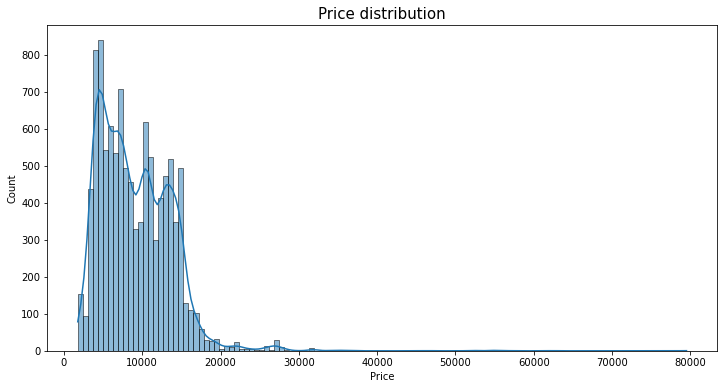

In [139]:
#distribution of price
plt.figure(figsize=(12,6))
sns.histplot(df_train['Price'], kde=True)
plt.title('Price distribution', fontsize=15)
plt.show()

In [140]:
df_train['Price'].min(), df_train['Price'].max()

(1759, 79512)

### Observations

* The ticket price is distributed from 1759 to 79512.
* The minimum ticket price is rs 1759 and the maximum ticket price is 79512
* Maximum number of passengers have selected ticket price from 5000 to 10000 ticket prices.

# Feature engineering

In [141]:
# Duration converting hours to minutes
df_train['Duration(mins)']=df_train['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
df_test['Duration(mins)']=df_test['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [142]:
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration(mins)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140


In [143]:
# converting date of journey from object to pandas datetime
df_train['journey_day']=pd.to_datetime(df_train.Date_of_Journey, format='%d/%m/%Y').dt.day
df_train['journey_month']=pd.to_datetime(df_train.Date_of_Journey, format='%d/%m/%Y').dt.month
df_train['journey_Year']=pd.to_datetime(df_train.Date_of_Journey, format='%d/%m/%Y').dt.year
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration(mins),journey_day,journey_month,journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,9,6,2019


In [147]:
# converting date of journey from object to pandas datetime
df_test['journey_day']=pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.day
df_test['journey_month']=pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.month
df_test['journey_Year']=pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.year
df_test.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration(mins),journey_day,journey_month,journey_Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,655,6,6,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,240,12,5,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,1425,21,5,2019


In [148]:
df_train['dep_hour']= pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['dep_min']= pd.to_datetime(df_train.Dep_Time).dt.minute
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration(mins),journey_day,journey_month,journey_Year,dep_hour,dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,24,3,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,5,2019,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,9,6,2019,9,25


In [149]:
df_test['dep_hour']= pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['dep_min']= pd.to_datetime(df_test.Dep_Time).dt.minute
df_test.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration(mins),journey_day,journey_month,journey_Year,dep_hour,dep_min
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,655,6,6,2019,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,240,12,5,2019,6,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,1425,21,5,2019,19,15


In [150]:
df_train['arrival_hour']= pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['arrival_min']= pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration(mins),journey_day,journey_month,journey_Year,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,9,6,2019,9,25,4,25


In [151]:
df_test['arrival_hour']= pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['arrival_min']= pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration(mins),journey_day,journey_month,journey_Year,dep_hour,dep_min,arrival_hour,arrival_min
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,655,6,6,2019,17,30,4,25
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,240,12,5,2019,6,20,10,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,1425,21,5,2019,19,15,19,0


In [152]:
# dropping unwanted columns
df_train.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'],axis=1 , inplace=True)
df_test.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'],axis=1 , inplace=True)

In [153]:
df_train.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration(mins),journey_day,journey_month,journey_Year,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,170,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,445,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,1140,9,6,2019,9,25,4,25


In [154]:
df_test.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration(mins),journey_day,journey_month,journey_Year,dep_hour,dep_min,arrival_hour,arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,655,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,240,12,5,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,1425,21,5,2019,19,15,19,0


In [155]:
# final dataset shape
print('Shape of train dataset: ', df_train.shape)
print('shape of test dataset: ', df_test.shape)

Shape of train dataset:  (10682, 15)
shape of test dataset:  (2671, 14)


# Vizualisation

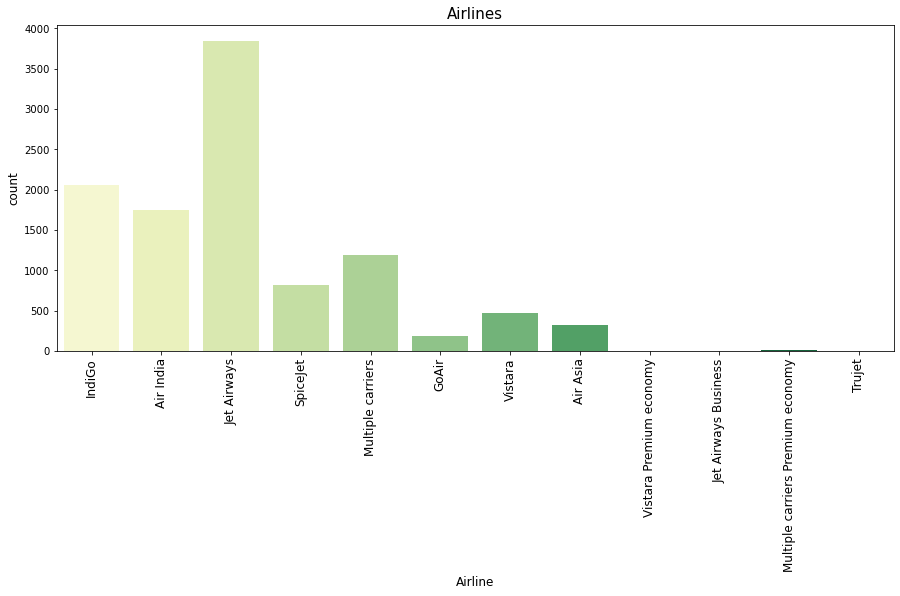

No of different Airlines:  12


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [168]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Airline'], palette='YlGn')
plt.title('Airlines', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()



print('No of different Airlines: ', len(df_train['Airline'].unique()))
df_train['Airline'].value_counts()

### Observations

* Dataset has records of 12 differents airlines.
* Maximum no of records are of Jet Airways airlines(3849)
* Trujet airlines have onlyone record.

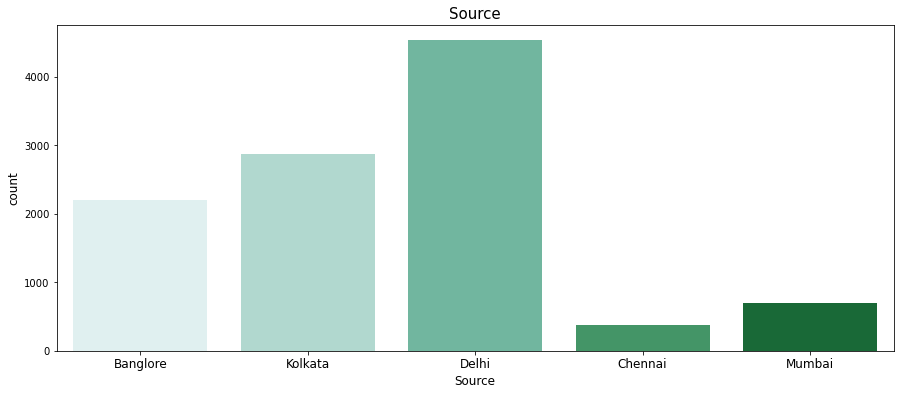

No of different Sources:  5


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [169]:

plt.figure(figsize=(15,6))
sns.countplot(df_train['Source'], palette='BuGn')
plt.title('Source', fontsize=15)
plt.xticks(rotation=00, fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()



print('No of different Sources: ', len(df_train['Source'].unique()))
df_train['Source'].value_counts()

### Observations

* There are total 5 different sources for flights.
* Most number of flights took off from Delhi(4536 flights), Kolkata(2871 flights) and Bangalore(2197 flights)
* Chennai comes in last in sources for flights

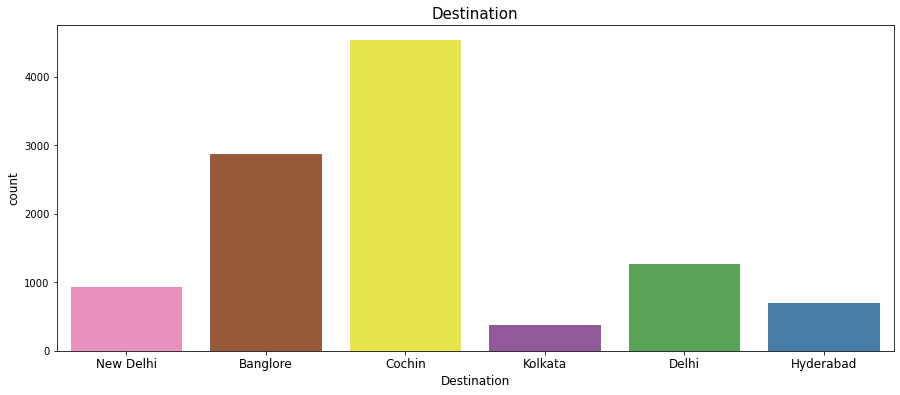

No of different Destinations:  6


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [170]:

plt.figure(figsize=(15,6))
sns.countplot(df_train['Destination'], palette='Set1_r')
plt.title('Destination', fontsize=15)
plt.xticks(rotation=00, fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()



print('No of different Destinations: ', len(df_train['Destination'].unique()))
df_train['Destination'].value_counts()

### Observations

* There are total 6 different destination people went for within India in 2019
* Most visited place by flight is Cochin (4536 flights) followed up by Bangalore(2871 flights) in 2019
* Least destinated place is Kolkata only 381 flights went to Kolkata.

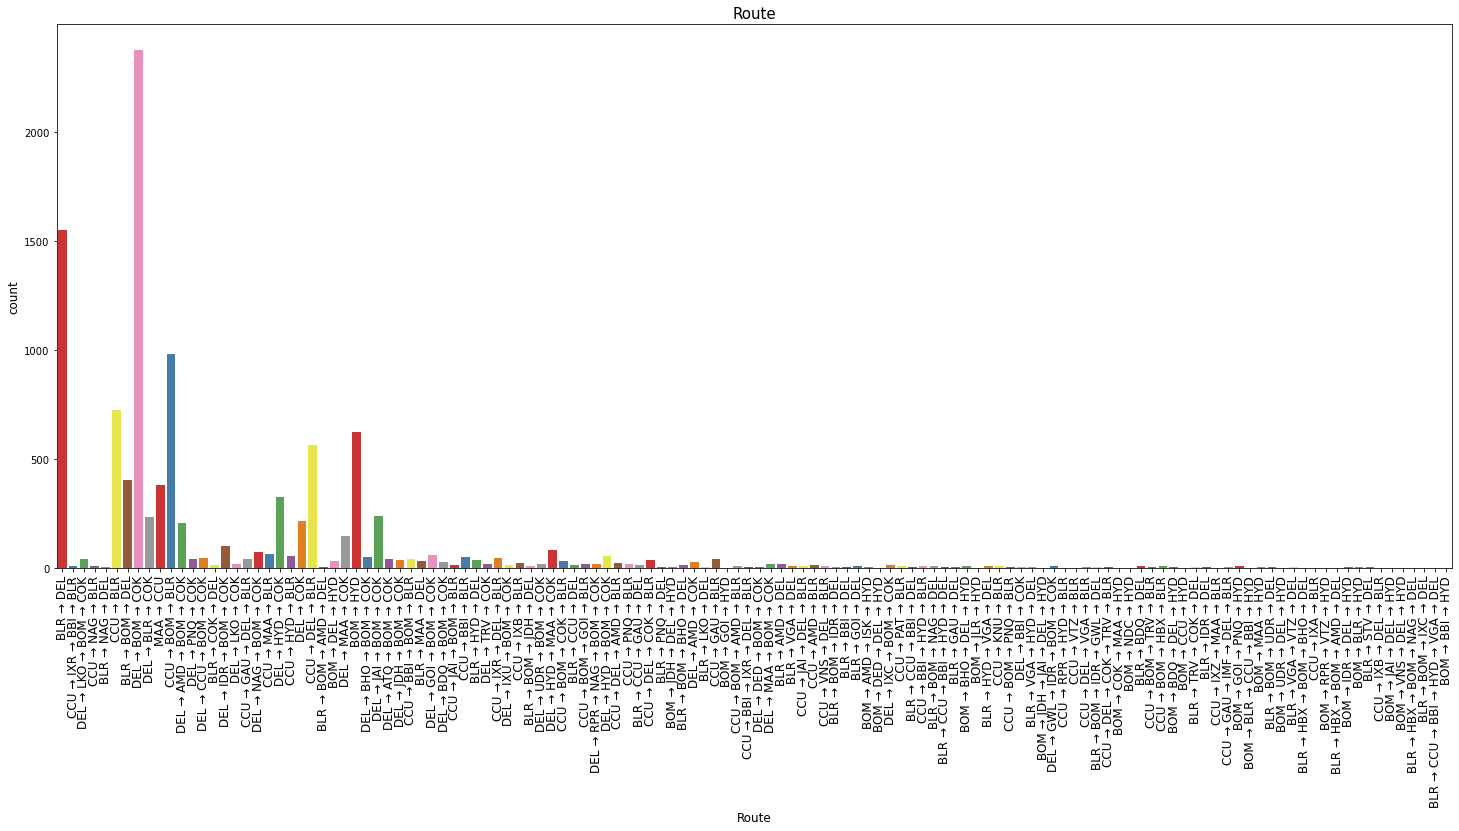

No of different Route:  128


DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [171]:
plt.figure(figsize=(25,10))
sns.countplot(df_train['Route'], palette='Set1')
plt.title('Route', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Route', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()


print('No of different Route: ', len(df_train['Route'].unique()))
df_train['Route'].value_counts()

### Observations

* There are recors of total 128 different routes
* Most used route by flights is 'DEL → BOM → COK'(2376) in 2019
* Second omost used route is BLR --> DEL (1552) in 2019

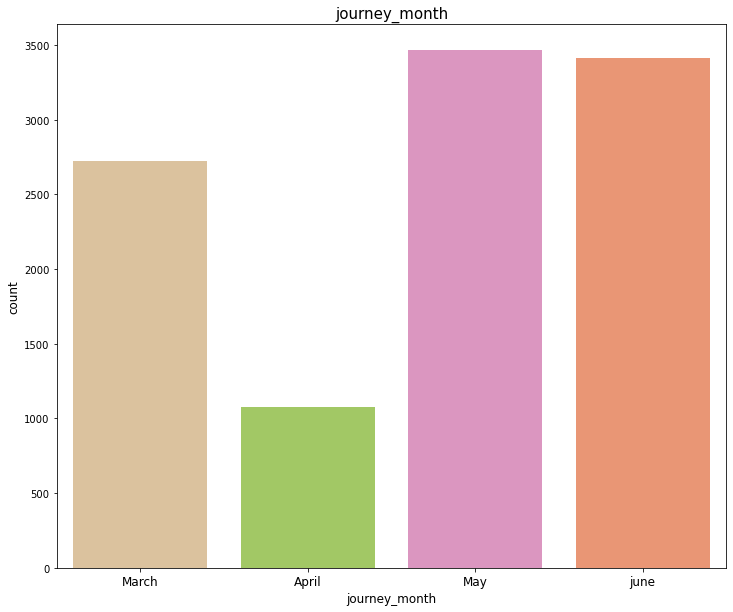

No of different Route:  4


5    3465
6    3414
3    2724
4    1079
Name: journey_month, dtype: int64

In [375]:
plt.figure(figsize=(12,10))
sns.countplot(df_train['journey_month'], palette='Set2_r')
plt.title('journey_month', fontsize=15)
plt.xticks([0,1,2,3],['March', 'April', 'May', 'june'], rotation=0, fontsize=12)
plt.xlabel('journey_month', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()


print('No of different Route: ', len(df_train['journey_month'].unique()))
df_train['journey_month'].value_counts()

### Observations

* Most number of flights took off in the month of May(3465) and June(3414)
* least number of flights took off in the month of April

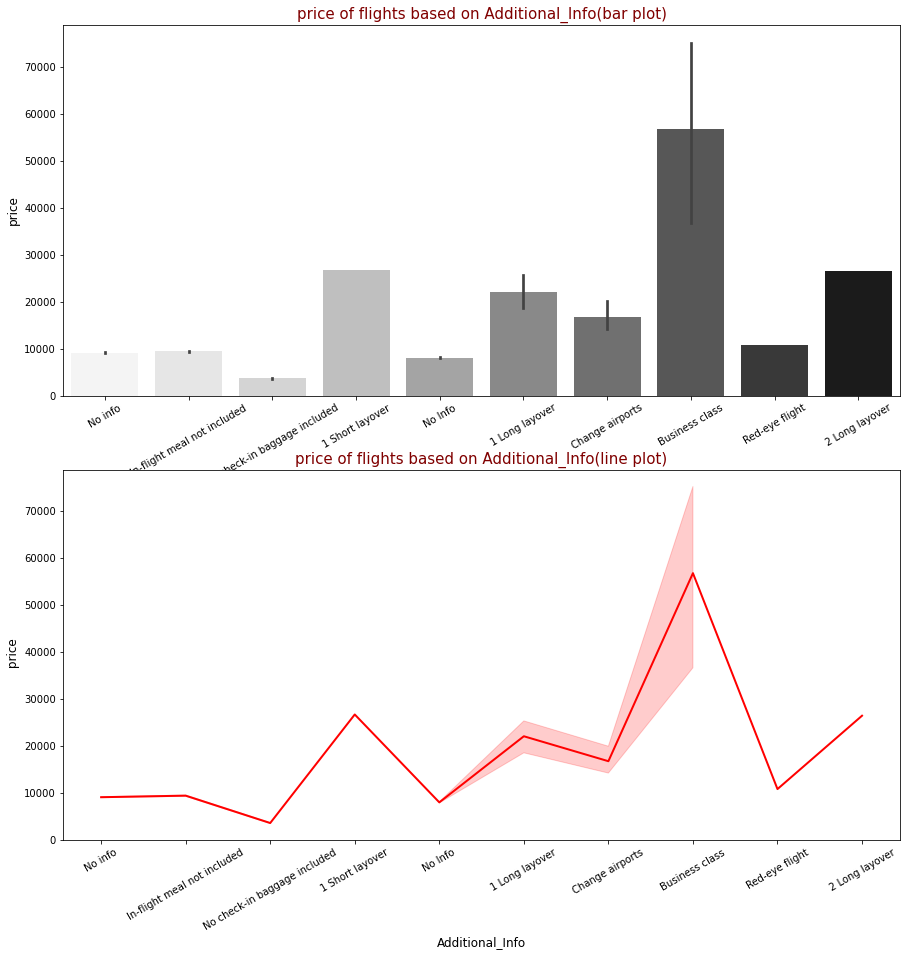

In [379]:
# Average price per year
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
sns.barplot(df_train['Additional_Info'], df_train['Price'], palette='Greys')
plt.title('price of flights based on Additional_Info(bar plot)', fontsize=15, color='maroon')
plt.xticks(rotation=30)
plt.xlabel('Additional_Info', fontsize=12)
plt.ylabel('price', fontsize=12)

plt.subplot(2,1,2)
sns.lineplot(df_train['Additional_Info'], df_train['Price'], color='red', linewidth=2)
plt.title('price of flights based on Additional_Info(line plot)', fontsize=15, color='maroon')
plt.xticks(rotation=30)
plt.xlabel('Additional_Info', fontsize=12)
plt.ylabel(' price', fontsize=12)

plt.show()


### Observations


* Buisness class flights are the expensie ones compared to other flights

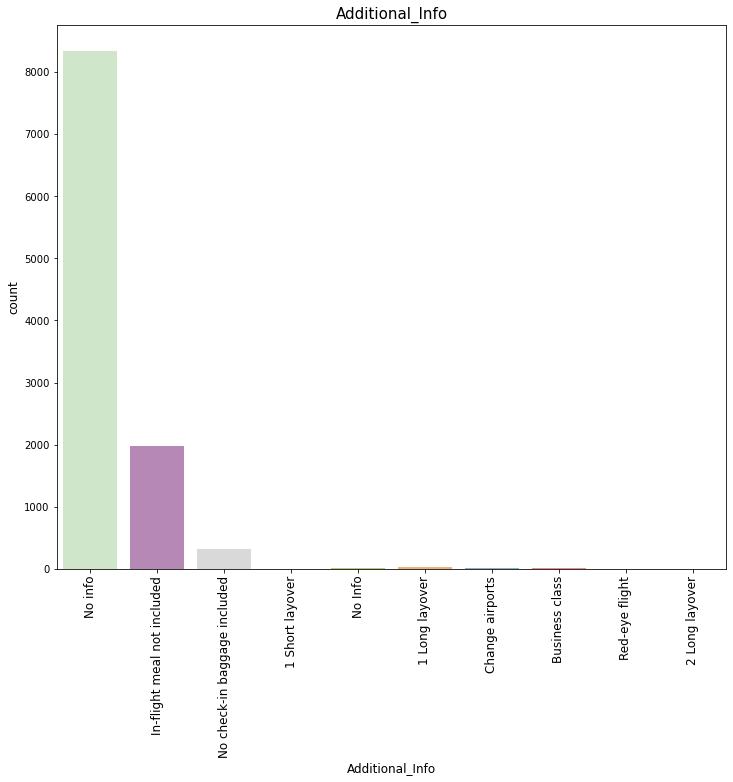

No of different Additional_Info:  10


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [383]:
plt.figure(figsize=(12,10))
sns.countplot(df_train['Additional_Info'], palette='Set3_r')
plt.title('Additional_Info', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Additional_Info', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()


print('No of different Additional_Info: ', len(df_train['Additional_Info'].unique()))
df_train['Additional_Info'].value_counts()

### Observations

* Dataset doestnot have additional information of 8344 flights
* Most used flights type is 'In-flight meal not included'

# Describing dataset

In [172]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10682,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10682,5,Delhi,4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10682,6,Cochin,4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10682,10,No info,8344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10682.0,NaN,NaN,NaN,9087.214567,4611.54881,1759.0,5277.0,8372.0,12373.0,79512.0
Duration(mins),10682.0,NaN,NaN,NaN,643.020502,507.830133,5.0,170.0,520.0,930.0,2860.0
journey_day,10682.0,NaN,NaN,NaN,13.509081,8.479363,1.0,6.0,12.0,21.0,27.0
journey_month,10682.0,NaN,NaN,NaN,4.708575,1.164408,3.0,3.0,5.0,6.0,6.0


### Observations

* Most flights are from Jet Airways	airlines 
* Most visited place is Cochin
* Most flights took off from Delhi
* Most Travelled route is DEL → BOM → COK'

In [173]:
df_train.corr()

,Price,Duration(mins),journey_day,journey_month,journey_Year,dep_hour,dep_min,arrival_hour,arrival_min
Price,1.000000,0.506480,-0.153774,-0.103643,NaN,0.006799,-0.024458,0.024244,-0.086155
Duration(mins),0.506480,1.000000,-0.022439,0.014836,NaN,0.002088,-0.019099,0.051531,-0.069663
journey_day,-0.153774,-0.022439,1.000000,-0.038359,NaN,0.002170,-0.008170,-0.003245,-0.017510
journey_month,-0.103643,0.014836,-0.038359,1.000000,NaN,0.039127,-0.059267,-0.003927,-0.100626
journey_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dep_hour,0.006799,0.002088,0.002170,0.039127,NaN,1.000000,-0.024745,0.005180,0.067911
dep_min,-0.024458,-0.019099,-0.008170,-0.059267,NaN,-0.024745,1.000000,0.043122,-0.017597
arrival_hour,0.024244,0.051531,-0.003245,-0.003927,NaN,0.005180,0.043122,1.000000,-0.154363
arrival_min,-0.086155,-0.069663,-0.017510,-0.100626,NaN,0.067911,-0.017597,-0.154363,1.000000


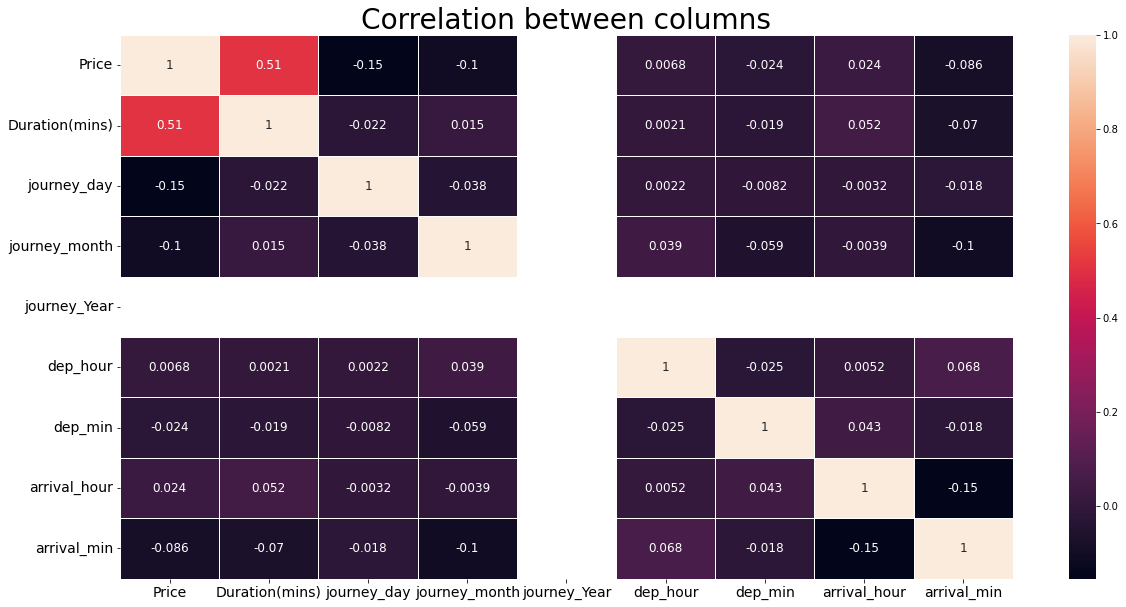

In [174]:
#df.corr() using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),linewidth='0.5',linecolor='white',annot=True, annot_kws={'size': 12})
plt.title('Correlation between columns', size=28)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

# Observations

* In our train dataset most of teh columns of negatively correlated 
* Duration column is 51 percent positively correlated to price column and it shows highest correlation among others.
* It seems no multicolinearity between columns

# checking outliers

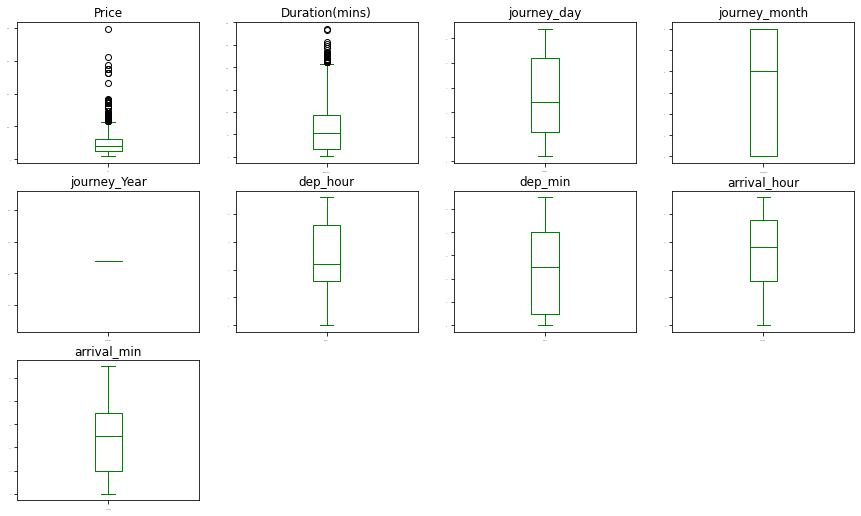

In [176]:
# for train data
list_col=['Price','Duration(mins)','journey_day','journey_month', 'journey_Year', 'dep_hour', 'dep_min', 'arrival_hour',  'arrival_min' ]
df_train.plot(kind='box',title=list_col, subplots=True, layout=(5,4), legend= True, fontsize=1, figsize=(15,15), color='green')
plt.show()

### Observations

* Price and Duration columns might have outliers

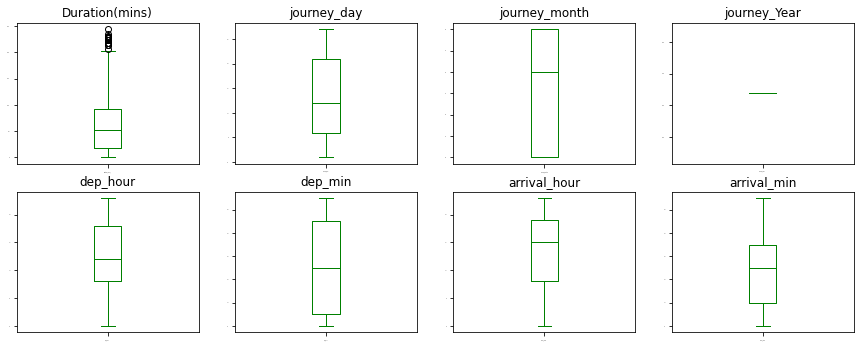

In [179]:
# for test data
list_col=['Duration(mins)','journey_day','journey_month', 'journey_Year', 'dep_hour', 'dep_min', 'arrival_hour',  'arrival_min' ]
df_test.plot(kind='box',title=list_col, subplots=True, layout=(5,4), legend= True, fontsize=1, figsize=(15,15), color='green')
plt.show()

### Observations

* Duration column might have outliers

# Skewness:

In [180]:
df_train.skew()

Price             1.812405
Duration(mins)    0.861411
journey_day       0.118174
journey_month    -0.387409
journey_Year      0.000000
dep_hour          0.112924
dep_min           0.167234
arrival_hour     -0.370146
arrival_min       0.110945
dtype: float64

In [181]:
df_test.skew()

Duration(mins)    0.896103
journey_day       0.199540
journey_month    -0.403700
journey_Year      0.000000
dep_hour          0.093759
dep_min           0.128515
arrival_hour     -0.443166
arrival_min       0.115267
dtype: float64

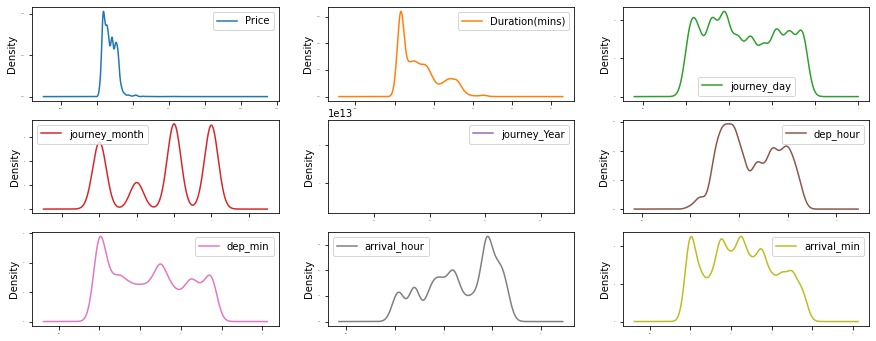

In [182]:
#vizualizing skewness
df_train.plot(kind='kde', subplots=True, layout=(5,3), sharex= False, legend= True, fontsize=1, figsize=(15,10))
plt.show()

### Observations

* All the columns shows skewness
* All the columns shows multiheads/ peaks curves

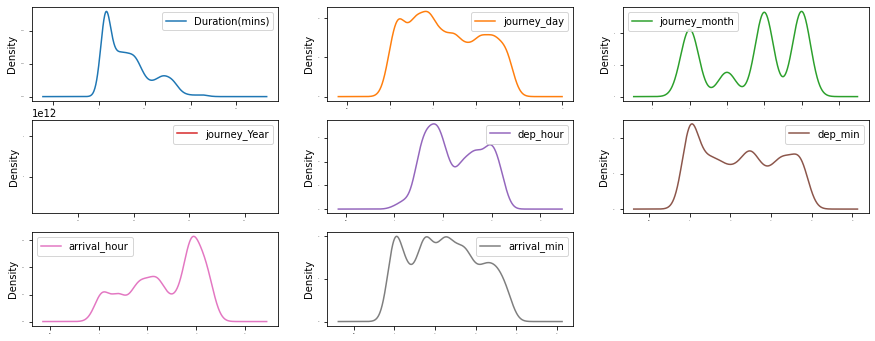

In [183]:
#vizualizing skewness
df_test.plot(kind='kde', subplots=True, layout=(5,3), sharex= False, legend= True, fontsize=1, figsize=(15,10))
plt.show()

### Observations

* All the columns shows skewness
* All the columns shows multiheads/ peaks curves

# Findings(Insights)

* Jet Airways is the Most used Airlines in the year 2019
* People has visited Cochin in the year 2019
* Dehli is place where most number of flights has took off
* DelHI to Bombay to Cochin is the most used rout by flights
* From analysis we can say that Cochin has more visitors from Delhi and Bombay 
* Most travelled month is May and June
* Most used flights is where meals is not included, it means to travel within india most people didn't preferred meals.

# Data Preprocessing

# Label Encoding

In [184]:
df_train.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration(mins),journey_day,journey_month,journey_Year,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,170,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,445,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,1140,9,6,2019,9,25,4,25


In [185]:
df_test.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration(mins),journey_day,journey_month,journey_Year,dep_hour,dep_min,arrival_hour,arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,655,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,240,12,5,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,1425,21,5,2019,19,15,19,0


* Before encoding we will drop all the columns which is of no use for example year column

In [188]:
df_train1=df_train.copy()
df_train1.drop(['journey_Year'],axis=1,inplace=True)
df_test1=df_test.copy()
df_test1.drop('journey_Year', axis=1, inplace=True)

In [192]:
# converting string into integer
from sklearn.preprocessing import LabelEncoder

#creating instance
le=LabelEncoder()

#training data
le.fit(df_train1['Airline'])
#transforming data
df_train1['Airline']=le.transform(df_train1['Airline'])

le.fit(df_train1['Source'])
df_train1['Source']=le.transform(df_train1['Source'])

le.fit(df_train1['Destination'])
df_train1['Destination']=le.transform(df_train1['Destination'])

le.fit(df_train1['Route'])
df_train1['Route']=le.transform(df_train1['Route'])

le.fit(df_train1['Total_Stops'])
df_train1['Total_Stops']=le.transform(df_train1['Total_Stops'])

le.fit(df_train1['Additional_Info'])
df_train1['Additional_Info']=le.transform(df_train1['Additional_Info'])

le.fit(df_train1['journey_day'])
df_train1['journey_day']=le.transform(df_train1['journey_day'])

le.fit(df_train1['journey_month'])
df_train1['journey_month']=le.transform(df_train1['journey_month'])

le.fit(df_train1['dep_hour'])
df_train1['dep_hour']=le.transform(df_train1['dep_hour'])

le.fit(df_train1['dep_min'])
df_train1['dep_min']=le.transform(df_train1['dep_min'])

le.fit(df_train1['arrival_hour'])
df_train1['arrival_hour']=le.transform(df_train1['arrival_hour'])

le.fit(df_train1['arrival_min'])
df_train1['arrival_min']=le.transform(df_train1['arrival_min'])

In [194]:
df_train1.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration(mins),journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,3,0,5,18,4,8,3897,170,8,0,22,4,1,2
1,1,3,0,84,1,8,7662,445,0,2,5,10,13,3


In [195]:
# converting string into integer
from sklearn.preprocessing import LabelEncoder

#creating instance
le=LabelEncoder()

#training data
le.fit(df_test1['Airline'])
#transforming data
df_test1['Airline']=le.transform(df_test1['Airline'])

le.fit(df_test1['Source'])
df_test1['Source']=le.transform(df_test1['Source'])

le.fit(df_test1['Destination'])
df_test1['Destination']=le.transform(df_test1['Destination'])

le.fit(df_test1['Route'])
df_test1['Route']=le.transform(df_test1['Route'])

le.fit(df_test1['Total_Stops'])
df_test1['Total_Stops']=le.transform(df_test1['Total_Stops'])

le.fit(df_test1['Additional_Info'])
df_test1['Additional_Info']=le.transform(df_test1['Additional_Info'])

le.fit(df_test1['journey_day'])
df_test1['journey_day']=le.transform(df_test1['journey_day'])

le.fit(df_test1['journey_month'])
df_test1['journey_month']=le.transform(df_test1['journey_month'])

le.fit(df_test1['dep_hour'])
df_test1['dep_hour']=le.transform(df_test1['dep_hour'])

le.fit(df_test1['dep_min'])
df_test1['dep_min']=le.transform(df_test1['dep_min'])

le.fit(df_test1['arrival_hour'])
df_test1['arrival_hour']=le.transform(df_test1['arrival_hour'])

le.fit(df_test1['arrival_min'])
df_test1['arrival_min']=le.transform(df_test1['arrival_min'])

In [197]:
df_test1.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration(mins),journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,4,2,1,76,0,5,655,2,3,17,6,4,5
1,3,3,0,65,0,5,240,4,2,6,4,10,4
2,4,2,1,76,0,3,1425,7,2,19,3,19,0


# Removing outliers:

using Zscore technique

In [198]:
from scipy.stats import zscore

In [202]:
z =np.abs(zscore(df_train1['Price']))
print(np.where(z<3))
dn=df_train1[(z<3)]
print('Shape of New Dataframe dn:',dn.shape)

(array([    0,     1,     2, ..., 10679, 10680, 10681], dtype=int64),)
Shape of New Dataframe dn: (10586, 14)


In [204]:
z =np.abs(zscore(dn['Duration(mins)']))
print(z)
print(len(np.where(z<3)))
dn1=dn[(z<3)]
print('Shape of New Dataframe dn1:',dn1.shape)

0        0.928225
1        0.387187
2        0.980163
3        0.623277
4        0.701973
           ...   
10678    0.967574
10679    0.957737
10680    0.908551
10681    0.947900
10682    0.278980
Name: Duration(mins), Length: 10586, dtype: float64
1
Shape of New Dataframe dn1: (10521, 14)


In [207]:
z =np.abs(zscore(df_test1['Duration(mins)']))
print(np.where(z<3))
dn_test=df_test1[(z<3)]
print('Shape of New Dataframe dn:',dn_test.shape)

(array([   0,    1,    2, ..., 2668, 2669, 2670], dtype=int64),)
Shape of New Dataframe dn: (2653, 13)


In [208]:
df_new=dn1
print('old dataframe',df_train1.shape)
print('new dataframe',df_new.shape)
print('no of rows dropped',df_train1.shape[0]-df_new.shape[0])

old dataframe (10682, 14)
new dataframe (10521, 14)
no of rows dropped 161


# Splitting data into x(features) and y(target)

In [238]:
#splitting data into x and y 
x=df_new.drop('Price', axis=1) # dropping target column from dataframe and assigning the dataframe as x
y=df_new['Price'] #assigning target column(W) to y variable

In [239]:
x.sample()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration(mins),journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
8275,1,2,1,112,1,8,1580,9,3,7,1,9,5


In [240]:
y.sample()

10015    3597
Name: Price, dtype: int64

# VIF(checking multicolinearity)

In [241]:
#library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [242]:
VIF =[]
for i in range(len(x.columns)):
    VIF.append(variance_inflation_factor(exog=x.values, exog_idx=i))

datavif={'Features':x.columns, 'VIF value': VIF}    
vif_df=pd.DataFrame(datavif)
vif_df

,Features,VIF value
0,Airline,3.713623
1,Source,5.692204
2,Destination,3.233455
3,Route,8.109112
4,Total_Stops,3.290855
5,Additional_Info,22.336276
6,Duration(mins),3.994926
7,journey_day,3.413043
8,journey_month,3.668188
9,dep_hour,5.538823


### Observations

* Additional info is showing multicolinearity

# Removing skewness

In [243]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [244]:
from sklearn.preprocessing import power_transform
x_test=power_transform(df_test1,method='yeo-johnson')

In [245]:
x_df=pd.DataFrame(x)
x_df.skew()

0    -0.014672
1    -0.236920
2     0.041469
3    -0.435081
4     0.323620
5    -1.360014
6    -0.047792
7    -0.183201
8    -0.338198
9    -0.106230
10   -0.207733
11   -0.353257
12   -0.202027
dtype: float64

In [246]:
x_test_df=pd.DataFrame(x_test)
x_test_df.skew()

0    -0.044111
1    -0.238390
2     0.039851
3    -0.321029
4     0.351675
5    -1.538898
6    -0.049691
7    -0.160572
8    -0.341205
9    -0.106211
10   -0.221800
11   -0.408083
12   -0.204967
dtype: float64

# scaling independent data

using StandardScaler

In [247]:
#mean=0, std=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [248]:
scaler.fit(x)
x_scaled=scaler.transform(x)

In [249]:
scaler.fit(x_test)
x_test_scaled=scaler.transform(x_test)

In [250]:
y2=np.array(df_sample)

In [251]:
y2

array([[15998],
       [16612],
       [25572],
       ...,
       [22720],
       [23544],
       [27489]], dtype=int64)

# Model Building and Evaluation

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Since our target variable(Price) is continous data we use Regression Models

# Linear Regression

## Finding Best Random State for LinerRegression

In [253]:
from sklearn.linear_model import LinearRegression

maxAcc=0
maxRS=0
scores=[]

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    #creating instance for linearRegression
    lm=LinearRegression()
    #training the Model
    lm.fit(x_train,y_train)
    #predicting  the target test value
    pred_lm=lm.predict(x_test)
    acc=r2_score(y_test,pred_lm)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)


Accuracy 0.49794275433575297 random_state 1
Accuracy 0.5099450951998816 random_state 3
Accuracy 0.511258430069837 random_state 8
Accuracy 0.515640083777554 random_state 15
Accuracy 0.5185374925555476 random_state 35
Accuracy 0.5224760061099802 random_state 42
Accuracy 0.5242762621768245 random_state 106
Accuracy 0.5284385315583318 random_state 117
Accuracy 0.5322005344873783 random_state 747
Accuracy 0.5356339422280025 random_state 1183
Accuracy 0.535703117814311 random_state 1431


## LinearRegression with best random state

In [254]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.20,random_state=1431)

In [255]:
#printing shape of train and test data
print('x_train1 shape: ',x_train1.shape)
print('x_test1 shape: ',x_test1.shape)
print('y_train1 shape: ',y_train1.shape)
print('y_test1 shape: ',y_test1.shape)

x_train1 shape:  (8416, 13)
x_test1 shape:  (2105, 13)
y_train1 shape:  (8416,)
y_test1 shape:  (2105,)


In [256]:
#creating instance for linearRegression
lm=LinearRegression()
#training the Model
lm.fit(x_train1,y_train1)
#predicting  the target value
lm_pred=lm.predict(x_test1)

## Evaluation

In [257]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

abserror=mean_absolute_error(y_test1,lm_pred)

#calculating the percentage of mean absolute rror
mean_abs_percentage_error= 100 * (abserror / y_test1)

print(' mean absolute error:', abserror,'\n','mean absolute error percentage:', round(np.mean(mean_abs_percentage_error),2),'%')

 mean absolute error: 2188.4935653721022 
 mean absolute error percentage: 31.74 %


In [259]:
#calculating r2_score
from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test1,lm_pred),'\n\nAccuracy:',round(100*(r2_score(y_test1,lm_pred)),2),'%')

r2_score: 0.535703117814311 

Accuracy: 53.57 %


## cross-validation of the model

In [264]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test1,lm_pred)

#Linear Regression
scr=cross_val_score(lm,x,y,cv=5)
print('cross validation score of LinearRegression at cross fold 5: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100   )

cross validation score of LinearRegression at cross fold 5:  49.0414127522622 and accuracy score of testing model is: 53.5703117814311


# Random Forest Regressor

## Finding Best Random State for Random Forest Regressor

In [267]:
from sklearn.ensemble import RandomForestRegressor

maxAcc=0
maxRS=0

for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    #creating instance for RandomForestRegressor
    RFR = RandomForestRegressor(n_estimators = 20, random_state = 50)
    # training model using training data
    RFR.fit(x_train, y_train)
    #predicting the data
    pred_RFR=RFR.predict(x_test)
    acc=r2_score(y_test,pred_RFR)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.9181626049625957 random_state 1
Accuracy 0.9226724161770906 random_state 3
Accuracy 0.9232602564138285 random_state 5
Accuracy 0.9245919344634955 random_state 7
Accuracy 0.9270267480252423 random_state 8
Accuracy 0.9325523471944104 random_state 17
Accuracy 0.9333586374845996 random_state 72
Accuracy 0.9353212172203466 random_state 103


## Random Forest Regressor with best random state

In [268]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_scaled,y,test_size=0.20,random_state=103)

In [335]:
#printing shape of train and test data
print('x_train2 shape: ',x_train2.shape)
print('x_test2 shape: ',x_test2.shape)
print('y_train2 shape: ',y_train2.shape)
print('y_test2 shape: ',y_test2.shape)

x_train2 shape:  (8416, 13)
x_test2 shape:  (2105, 13)
y_train2 shape:  (8416,)
y_test2 shape:  (2105,)


In [339]:
#creating instance for RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 20, random_state = 50)

# training model using training data
RFR.fit(x_train2, y_train2)

#predicting the data
RFR_pred=RFR.predict(x_test2)

## Evaluation

In [340]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

abserror=mean_absolute_error(y_test2,RFR_pred)

#calculating the percentage of mean absolute rror
mean_abs_percentage_error= 100 * (abserror / y_test2)

print(' mean absolute error:', abserror,'\n','mean absolute error percentage:', round(np.mean(mean_abs_percentage_error),2),'%')

 mean absolute error: 535.5362059156205 
 mean absolute error percentage: 7.68 %


In [341]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test2,RFR_pred)

#calculating the percentage of mean squared error
mse_percentage= 100 * (mse / y_test2)

print(' mean squared error:', mse,'\n','mean squared error percentage:', round(np.mean(mse_percentage),2),'%')

 mean squared error: 1076640.716567137 
 mean squared error percentage: 15446.88 %


In [342]:
#calculating root mean squred error
rmse=np.sqrt(mse)

print('Root mean squared error:',rmse)

Root mean squared error: 1037.6129897833475


In [343]:
#calculating the mean squared log error
from sklearn.metrics import mean_squared_log_error

msle=mean_squared_log_error(y_test2,RFR_pred)
print(' mean squared log error:', msle)

 mean squared log error: 0.013158295862131932


In [344]:
#calculating score of train and test data
print('score for training of model: ',RFR.score(x_train2,y_train2))

score for training of model:  0.9836065925828372


In [346]:
# calculating r2_score
from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test2,RFR_pred),'\n\nAccuracy:',round(100*(r2_score(y_test2,RFR_pred)),2),'%')

r2_score: 0.9353212172203466 

Accuracy: 93.53 %


## cross-validation of the model

In [282]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test2,RFR_pred)

#Super Vector Regressor
scr=cross_val_score(RFR,x,y,cv=10)
print('cross validation score of Random Forest Regressor at cross fold 15: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100)

cross validation score of Random Forest Regressor at cross fold 15:  92.35409063278895 and accuracy score of testing model is: 93.53212172203466


# XGBRegressor

In [283]:
! pip install xgboost==1.0.1

In [285]:
from xgboost.sklearn import XGBRegressor

In [286]:
xgb=XGBRegressor()

## Finding best random state for XGBRegressor

In [289]:
maxAcc=0
maxRS=0

for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    #training the data
    xgb.fit(x_train,y_train)

    #predicting the data
    pred_xgb=xgb.predict(x_test)
    acc=r2_score(y_test,pred_xgb)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Accuracy', maxAcc, 'random_state', maxRS)

Accuracy 0.9308181470707977 random_state 1
Accuracy 0.9349400085406232 random_state 3
Accuracy 0.9352663331012098 random_state 7
Accuracy 0.9414178369548857 random_state 8
Accuracy 0.9429434766619059 random_state 78


## XGBRegressor with best random state

In [290]:
x_train4,x_test4,y_train4,y_test4=train_test_split(x_scaled,y,test_size=0.20,random_state=78)

In [291]:
#printing shape of train and test data
print('x_train4 shape: ',x_train4.shape)
print('x_test4 shape: ',x_test4.shape)
print('y_train4 shape: ',y_train4.shape)
print('y_test4 shape: ',y_test4.shape)

x_train4 shape:  (8416, 13)
x_test4 shape:  (2105, 13)
y_train4 shape:  (8416,)
y_test4 shape:  (2105,)


In [292]:
#training the data
xgb.fit(x_train4,y_train4)

#predicting the data
xgb_pred=xgb.predict(x_test4)

## Evaluation

In [293]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

abserror=mean_absolute_error(y_test4,xgb_pred)

#calculating the percentage of mean absolute rror
mean_abs_percentage_error= 100 * (abserror / y_test4)

print(' mean absolute error:', abserror,'\n','mean absolute error percentage:', round(np.mean(mean_abs_percentage_error),2),'%')

 mean absolute error: 617.2051891770896 
 mean absolute error percentage: 8.98 %


In [294]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test4,xgb_pred)

#calculating the percentage of mean squared error
mse_percentage= 100 * (mse / y_test4)

print(' mean squared error:', mse,'\n','mean squared error percentage:', round(np.mean(mse_percentage),2),'%')

 mean squared error: 932945.1479642907 
 mean squared error percentage: 13574.4 %


In [295]:
#calculating root mean squred error
rmse=np.sqrt(mse)

print('Root mean squared error:',rmse)

Root mean squared error: 965.8908571698413


In [296]:
#calculating the mean squared log error
from sklearn.metrics import mean_squared_log_error

msle=mean_squared_log_error(y_test4,xgb_pred)
print(' mean squared log error:', msle)

 mean squared log error: 0.012559933662128715


In [297]:
#calculating score of train and test data
print('score for training of model: ',xgb.score(x_train4,y_train4))

score for training of model:  0.9749905732481605


In [298]:
#calculating r2_score
from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test4,xgb_pred),'\n\nAccuracy:',round(100*(r2_score(y_test4,xgb_pred)),2),'%')

r2_score: 0.9429434766619059 

Accuracy: 94.29 %


## cross-validation of the model

In [303]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test4,xgb_pred)

#XGBRegressor
scr=cross_val_score(xgb,x,y,cv=10)
print('cross validation score of XGBRegressor at cross fold 10: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100)

cross validation score of XGBRegressor at cross fold 10:  93.60515416642802 and accuracy score of testing model is: 94.29434766619059


# Regularization

In [304]:
from sklearn.linear_model import Lasso

In [305]:
maxAcc=0
maxRS=0
scores=[]

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    ls=Lasso()
    ls.fit(x_train,y_train)
    ls_pred=ls.predict(x_test)
    scores.append(r2_score(y_test,ls_pred))
    
print(np.argmax(scores))

1430


## Regularization with best random state

In [307]:
x_train5,x_test5,y_train5,y_test5=train_test_split(x_scaled,y,test_size=0.20,random_state=1430)

In [308]:
#printing shape of train and test data
print('x_train5 shape: ',x_train5.shape)
print('x_test5 shape: ',x_test5.shape)
print('y_train5 shape: ',y_train5.shape)
print('y_test5 shape: ',y_test5.shape)

x_train5 shape:  (8416, 13)
x_test5 shape:  (2105, 13)
y_train5 shape:  (8416,)
y_test5 shape:  (2105,)


In [309]:
#creating insatnce
ls=Lasso()
#training model
ls.fit(x_train5,y_train5)
#predicting data
ls_pred=ls.predict(x_test5)

## Evaluation

In [310]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

abserror=mean_absolute_error(y_test5,ls_pred)

#calculating the percentage of mean absolute rror
mean_abs_percentage_error= 100 * (abserror / y_test5)

print(' mean absolute error:', abserror,'\n','mean absolute error percentage:', round(np.mean(mean_abs_percentage_error),2),'%')

 mean absolute error: 2282.8884640579563 
 mean absolute error percentage: 33.15 %


In [311]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test5,ls_pred)

#calculating the percentage of mean squared error
mse_percentage= 100 * (mse / y_test5)

print(' mean squared error:', mse,'\n','mean squared error percentage:', round(np.mean(mse_percentage),2),'%')

 mean squared error: 8578893.344446 
 mean squared error percentage: 124560.08 %


In [312]:
#calculating root mean squred error
rmse=np.sqrt(mse)

print('Root mean squared error:',rmse)

Root mean squared error: 2928.9747940953675


In [313]:
#calculating the mean squared log error
from sklearn.metrics import mean_squared_log_error

msle=mean_squared_log_error(y_test5,ls_pred)
print(' mean squared log error:', msle)

 mean squared log error: 0.11046776794479689


In [314]:
#calculating score of train model
print('score for training of model: ',ls.score(x_train5,y_train5))

score for training of model:  0.49622504076525076


In [315]:
#calculating r2_score
from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test5,ls_pred),'\n\nAccuracy:',round(100*(r2_score(y_test5,ls_pred)),2),'%')

r2_score: 0.4769072245152237 

Accuracy: 47.69 %


## cross-validation of the model

In [316]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test5,ls_pred)

#lasso regularization
scr=cross_val_score(ls,x,y,cv=15)
print('cross validation score of lasso at cross fold 4: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100)

cross validation score of lasso at cross fold 4:  49.00568296433685 and accuracy score of testing model is: 47.69072245152237


# Hyper Parameter Tuning: Ensembled techniques

From the above model XGBregressor working more effective compared to others so we continue hyper parameter tuning with XGBRegressor

In [347]:
from sklearn.model_selection import GridSearchCV

In [348]:
eta=list(np.arange(0.01,0.31,0.01))
parameters={'max_depth':[3,4,5,6,7,8,9,10],'min_child_weight':[1],'subsample':[1],'colsample_bytree':[0.5,1]}

XGB=XGBRegressor()
gcv=GridSearchCV(XGB,parameters)
gcv.fit(x_train4,y_train4)

print(gcv.best_params_)

{'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 1}


In [354]:
XGB_best=XGBRegressor(colsample_bytree=0.5,max_depth=7,min_child_weight=1,subsample=1)
XGB_best.fit(x_train4,y_train4)
XGB_best_pred=XGB_best.predict(x_test4)

XGB_score=r2_score(y_test4,XGB_best_pred)
XGB_best.score(x_train4,y_train4)
XGB_score

0.941942225027566

## Evaluation

In [355]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

abserror=mean_absolute_error(y_test4,XGB_best_pred)

#calculating the percentage of mean absolute rror
mean_abs_percentage_error= 100 * (abserror / y_test4)

print(' mean absolute error:', abserror,'\n','mean absolute error percentage:', round(np.mean(mean_abs_percentage_error),2),'%')

 mean absolute error: 608.7349732315172 
 mean absolute error percentage: 8.86 %


In [356]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test4,XGB_best_pred)

#calculating the percentage of mean squared error
mse_percentage= 100 * (mse / y_test4)

print(' mean squared error:', mse,'\n','mean squared error percentage:', round(np.mean(mse_percentage),2),'%')

 mean squared error: 949316.857972164 
 mean squared error percentage: 13812.61 %


In [357]:
print('score for tarining of model;',XGB_best.score(x_train4,y_train4))

score for tarining of model; 0.9778552286964144


In [358]:
XGB_score=r2_score(y_test4,XGB_best_pred)
XGB_score

0.941942225027566

## cross-validation of the model

In [362]:
from sklearn.model_selection import cross_val_score

test_score=r2_score(y_test4,XGB_best_pred)

#XGBRegressor
scr=cross_val_score(XGB_best,x,y,cv=19)
print('cross validation score of XGBRegressor at cross fold 19: ',100*scr.mean(), 'and accuracy score of testing model is:',test_score*100)

cross validation score of XGBRegressor at cross fold 19:  93.94341962939492 and accuracy score of testing model is: 94.1942225027566


# Model Saving(Regression Model)

In [364]:
import pickle

In [365]:
XGBR_flight_price='Flight_price.pkl'
pickle.dump(XGB_best,open(XGBR_flight_price,'wb'))

# Conclusion

* I have selected XGBRegressor as my final model on the basis of its r2_score and cv score are 94.19 and 93.94 respectively.
* the difference between r2_score and cv score is less among other models , its means the model is less underfitting/overfitting.